In [1]:
!pip install plotly_express

## Import Libraries
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()
# from scipy.optimize import curve_fit
# import statsmodels.api as sms

#%matplotlib inline
# import plotly.express as px
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
# plt.rcParams['figure.figsize'] = [15, 5]
# from IPython import display
# from ipywidgets import interact, widgets



In [2]:
## Read Data for Cases, Deaths and Recoveries
ConfirmedCases_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
Deaths_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
Recoveries_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [85]:
ConfirmedCases_raw.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20'],
      dtype='object')

In [86]:
### Melt the dateframe into the right shape and set index
def cleandata(df_raw):
    df_cleaned=df_raw.melt(id_vars=['Province/State','Country/Region','Lat','Long'],value_name='Cases',var_name='Date')
#     df_cleaned=df_cleaned.set_index(['Country/Region','Province/State','Date'])
    df_cleaned.reset_index()
    return df_cleaned 

# Clean all datasets
ConfirmedCases=cleandata(ConfirmedCases_raw)
Deaths=cleandata(Deaths_raw)
Recoveries=cleandata(Recoveries_raw)

In [183]:
ConfirmedCases.rename(columns={'Country/Region': 'Country'}, inplace=True)
ConfirmedCases['Date'] = pd.to_datetime(ConfirmedCases.Date)

In [124]:
def func_exp(x, a, b):
        return a * np.exp(b * x)

def exponential_regression (x_data, y_data):
    popt, pcov = curve_fit(func_exp, x_data, y_data)
    print(popt)
    puntos = plt.plot(x_data, y_data, 'x', color='xkcd:maroon', label = "data")
    curva_regresion = plt.plot(x_data, func_exp(x_data, *popt), color='xkcd:teal', label = "fit: {:.3f}, {:.3f}, {:.3f}".format(*popt))
    plt.legend()
    plt.show()
    return func_exp(x_data, *popt)

In [99]:
ConfirmedCases.head()

,Province/State,Country,Lat,Long,Date,Cases
0,NaN,Thailand,15.0000,101.0000,1/22/20,2
1,NaN,Japan,36.0000,138.0000,1/22/20,2
2,NaN,Singapore,1.2833,103.8333,1/22/20,0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0


In [170]:
italy = ConfirmedCases.query(" Country == 'Italy' ").Cases.to_numpy()
x_data = np.arange(0,len(italy[30:]))
y_data = np.log(italy[30:])

In [168]:
china = ConfirmedCases[ConfirmedCases.Country == 'China']
china = china.groupby(['Country', 'Date'])['Cases'].sum().reset_index().Cases.to_numpy()
x_data = np.arange(0,len(china))
y_data = np.log(china)

In [233]:
# Model for China

china = ConfirmedCases.query(" Country == 'China' ")
china = china.groupby(['Country', 'Date'])['Cases'].sum().reset_index().sort_values('Date').Cases.to_numpy()

x_data = np.arange(0,len(china))
y_data = np.log(china)

mod = sms.OLS(y_data, x_data)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.828
Model:                            OLS   Adj. R-squared (uncentered):              0.825
Method:                 Least Squares   F-statistic:                              246.2
Date:                Sat, 14 Mar 2020   Prob (F-statistic):                    3.67e-21
Time:                        15:37:02   Log-Likelihood:                         -149.99
No. Observations:                  52   AIC:                                      302.0
Df Residuals:                      51   BIC:                                      303.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

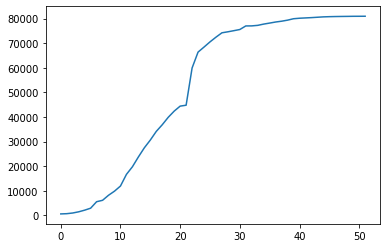

In [223]:
china = ConfirmedCases.query(" Country == 'China' ")
china = china.groupby(['Country', 'Date'])['Cases'].sum().reset_index().sort_values('Date').Cases
china.plot()

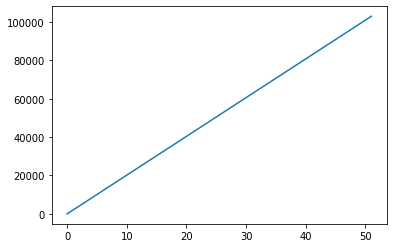

In [231]:
ypred = res.predict(x_data)
plt.plot(ypred)

In [265]:
import datetime
today = datetime.date.today()
yesterday = today - datetime.timedelta(days=1)
current_date = yesterday.strftime("%Y-%m-%d")

In [269]:
df = ConfirmedCases.groupby(['Country', 'Date'])['Cases'].sum().reset_index()
countries = ['Spain', 'France', 'Poland', 'Germany']
df.Country  countries
# df[df.Date == current_date]


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().